# Import Modules

In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import string
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib_venn import venn2_unweighted

In [13]:
mpl.rcParams['figure.dpi'] = 400
sns.set(context='paper', style='white') 

# Load data file

In [2]:
surechem_df = pd.read_csv('data/EDA_df.txt.gz', sep='\t', compression='gzip')
surechem_df.drop_duplicates(subset=['InChIKey'], inplace=True)
surechem_df.head(2)

,SureChEMBL_ID,SMILES,InChIKey,PATENT_ID,PUBLICATION_DATE,Field
0,SCHEMBL4,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,FAKRSMQSSFJEIM-RQJHMYQMSA-N,EP-2842582-A2,2015-03-04,Description
1757,SCHEMBL9,O=C(O)\C=C/C(=O)O.CCOC(=O)[C@H](CCC1=CC=CC=C1)...,OYFJQPXVCSSHAI-QFPUQLAESA-N,EP-2838373-A2,2015-02-25,Description


In [3]:
surechembl_cpds = set(surechem_df['InChIKey'].unique().tolist())
len(surechembl_cpds)

10686744

# Load Drugbank Withdrawn Data

In [4]:
drugbank_withdrawn_df = pd.read_csv('data/drugbank_withdrawn_structure_links.csv.zip')
drugbankwithdrawn_df = drugbank_withdrawn_df[drugbank_withdrawn_df['InChIKey'].isin(surechembl_cpds)]
drugbankwithdrawn_df.head(2)

,DrugBank ID,Name,CAS Number,Drug Groups,InChIKey,InChI,SMILES,Formula,KEGG Compound ID,KEGG Drug ID,PubChem Compound ID,PubChem Substance ID,ChEBI ID,ChEMBL ID,HET ID,ChemSpider ID,BindingDB ID
0,DB00106,Abarelix,183552-38-7,approved; investigational; withdrawn,AIWRTTMUVOZGPW-HSPKUQOVSA-N,InChI=1S/C72H95ClN14O14/c1-41(2)32-54(64(93)80...,CC(C)C[C@H](NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](C...,C72H95ClN14O14,NaN,D02738,16131215.0,46508237.0,337298.0,CHEMBL1252,NaN,10482301.0,50102442.0
1,DB00131,Adenosine phosphate,61-19-8,approved; investigational; nutraceutical; with...,UDMBCSSLTHHNCD-KQYNXXCUSA-N,InChI=1S/C10H14N5O7P/c11-8-5-9(13-2-12-8)15(3-...,NC1=C2N=CN([C@@H]3O[C@H](COP(O)(O)=O)[C@@H](O)...,C10H14N5O7P,C00020,D02769,6083.0,46507628.0,16027.0,CHEMBL752,AMP,5858.0,18137.0


In [5]:
drugbank_withdrawn_df = drugbank_withdrawn_df.drop_duplicates(subset='InChIKey', keep='first')

# Load Drugbank Investigational Data

In [6]:
drugbank_investigational_df = pd.read_csv('data/drugbank_investigational_structure_links.csv.zip')
drugbankinvestigational_df = drugbank_investigational_df[drugbank_investigational_df['InChIKey'].isin(surechembl_cpds)]
drugbankinvestigational_df.head(2)

,DrugBank ID,Name,CAS Number,Drug Groups,InChIKey,InChI,SMILES,Formula,KEGG Compound ID,KEGG Drug ID,PubChem Compound ID,PubChem Substance ID,ChEBI ID,ChEMBL ID,HET ID,ChemSpider ID,BindingDB ID
0,DB00006,Bivalirudin,128270-60-0,approved; investigational,OIRCOABEOLEUMC-GEJPAHFPSA-N,InChI=1S/C98H138N24O33/c1-5-52(4)82(96(153)122...,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,C98H138N24O33,NaN,D03136,16129704.0,46507415.0,59173.0,CHEMBL2103749,NaN,10482069.0,50248103.0
1,DB00007,Leuprolide,53714-56-0,approved; investigational,GFIJNRVAKGFPGQ-LIJARHBVSA-N,InChI=1S/C59H84N16O12/c1-6-63-57(86)48-14-10-2...,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,C59H84N16O12,C07612,D08113,NaN,46507635.0,6427.0,CHEMBL1201199,NaN,571356.0,50369395.0


In [7]:
drugbank_investigational_df = drugbank_investigational_df.drop_duplicates(subset='InChIKey', keep='first')

# Get unique compounds

In [8]:
drugbank_withdrawn_cpds = set(drugbankwithdrawn_df['InChIKey'].tolist())
drugbank_investigational_cpds = set(drugbankinvestigational_df['InChIKey'].tolist())

print(f'Drugbank withdrawn: {len(drugbank_withdrawn_cpds)}')
print(f'Drugbank investigational: {len(drugbank_investigational_cpds)}')

Drugbank withdrawn: 251
Drugbank investigational: 3235


In [9]:
Ab2 = len(surechembl_cpds)-len(drugbank_investigational_cpds)
aB2 = len(drugbank_investigational_df)-len(drugbank_investigational_cpds)
AB2 = len(drugbank_investigational_cpds)

In [10]:
Ab1 = len(surechembl_cpds)-len(drugbank_withdrawn_cpds)
aB1 = len(drugbank_withdrawn_df)-len(drugbank_withdrawn_cpds)
AB1 = len(drugbank_withdrawn_cpds)

# Visualisation

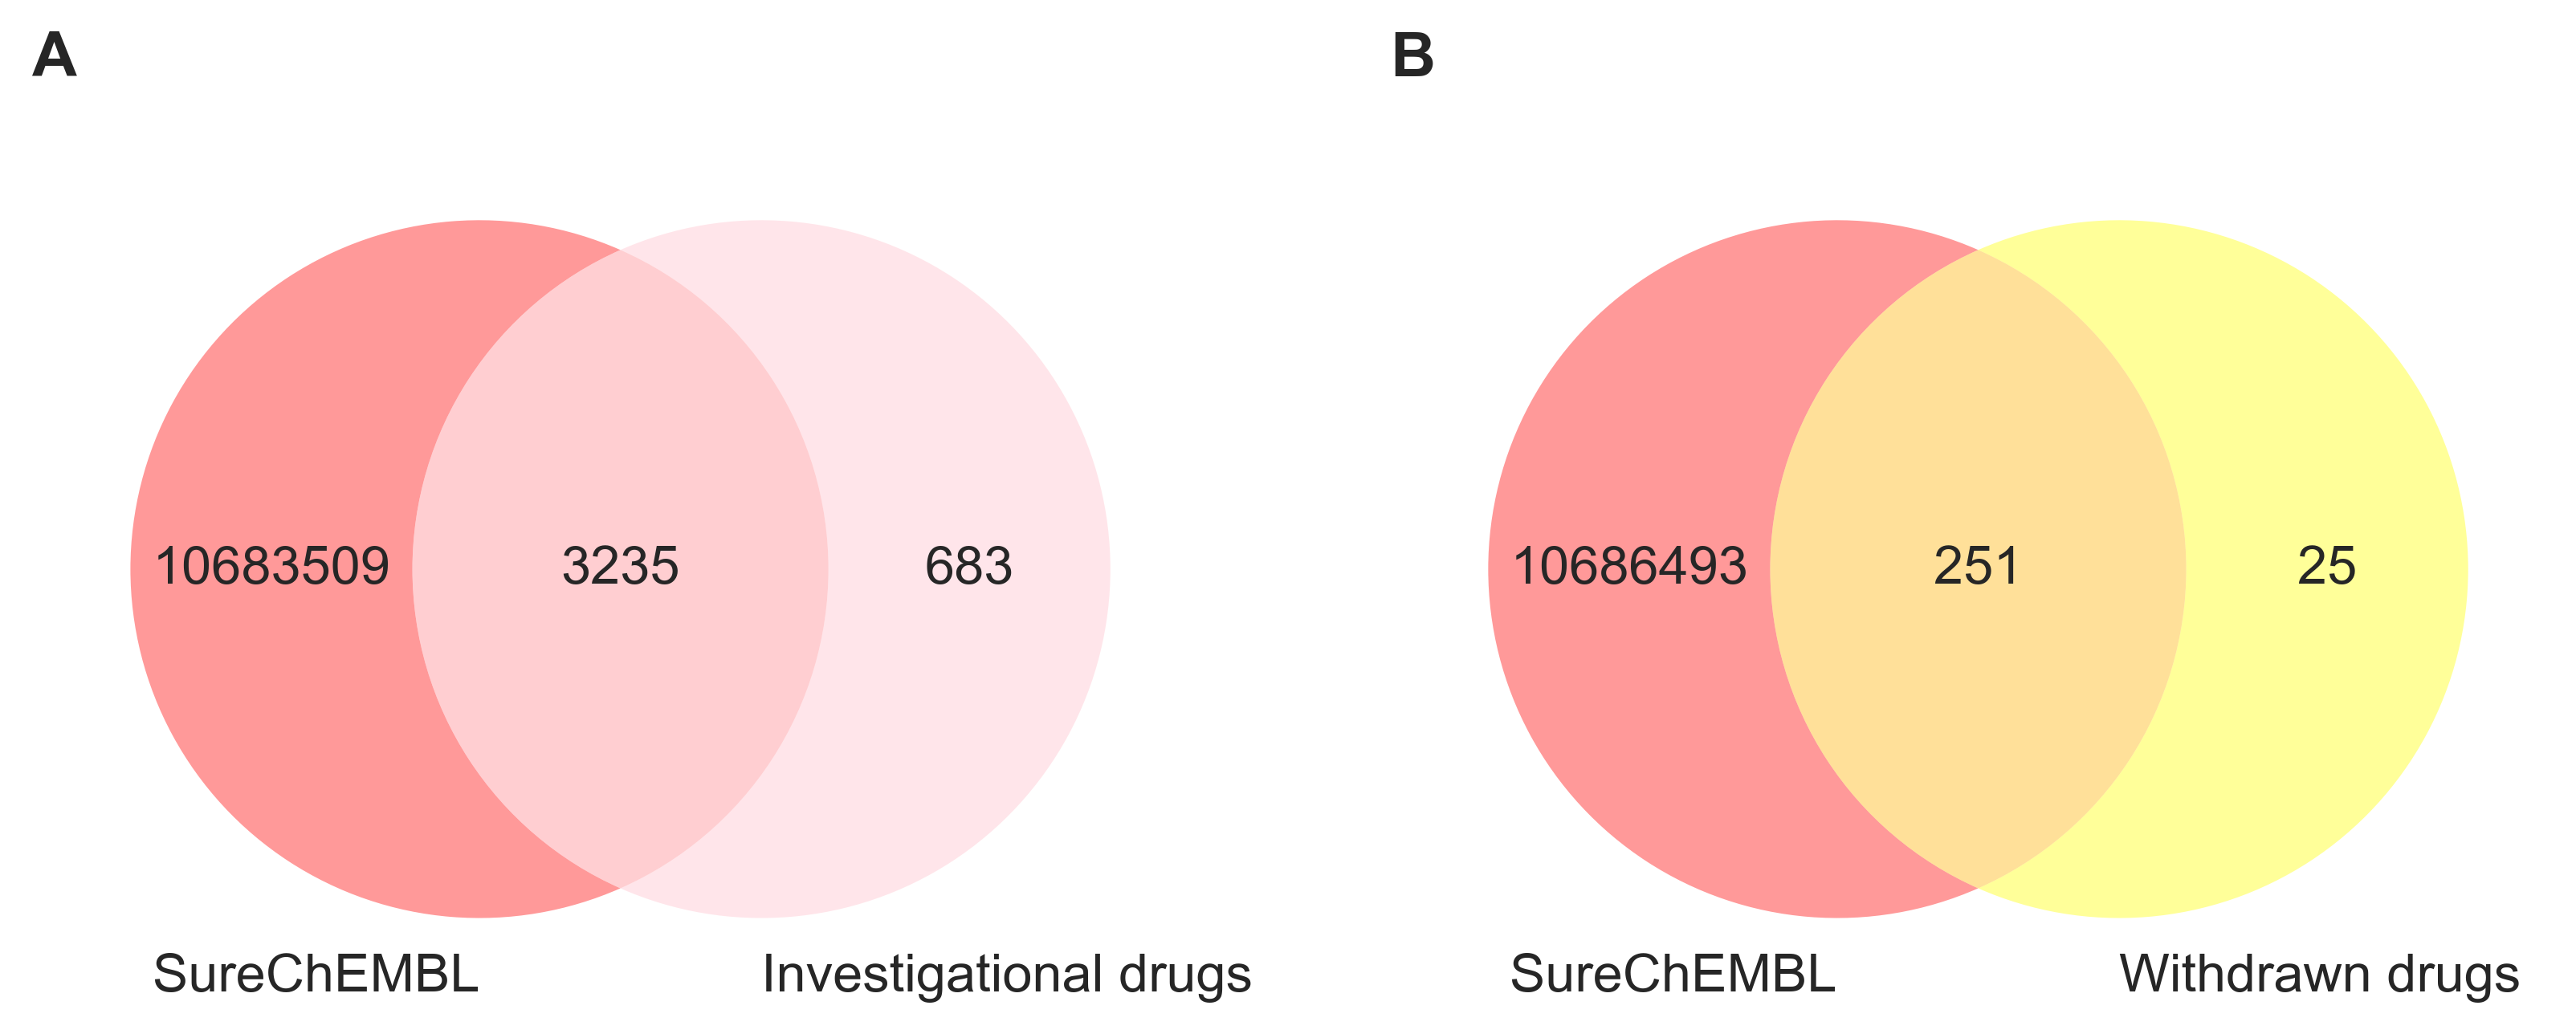

In [14]:
gs = gridspec.GridSpec(1, 2)

plt.figure(figsize = (10, 6))

ax1 = plt.subplot(gs[0, 0])
ax1 = venn2_unweighted(subsets = (Ab2,aB2, AB2), 
      set_labels = ('SureChEMBL', 'Investigational drugs'), set_colors=("red", "pink"))
for text in ax1.set_labels:
    text.set_fontsize(12)
for text in ax1.subset_labels:
    text.set_fontsize(12)
plt.text(
    0, 1.1, string.ascii_uppercase[0],
    size=14, weight='bold', horizontalalignment='center',
    verticalalignment='center', transform = plt.gca().transAxes
)

ax2 = plt.subplot(gs[0, 1])
ax2 = venn2_unweighted(subsets = (Ab1,aB1, AB1), 
      set_labels = ('SureChEMBL', 'Withdrawn drugs'), set_colors=("red", "yellow"))
for text in ax2.set_labels:
    text.set_fontsize(12)
for text in ax2.subset_labels:
    text.set_fontsize(12)
plt.text(
    0, 1.1, string.ascii_uppercase[1],
    size=14, weight='bold', horizontalalignment='center',
    verticalalignment='center', transform = plt.gca().transAxes
)
plt.show()

In [12]:
total_compounds = len(surechembl_cpds)
print(f'Total compounds: {total_compounds}')
drugbank_investigational_overlap = len(surechembl_cpds.intersection(drugbank_investigational_cpds))
print(f'drugbank investigational overlap: {drugbank_investigational_overlap} ({drugbank_investigational_overlap/total_compounds:.2%})')
drugbank_withdrawn_overlap = len(surechembl_cpds.intersection(drugbank_withdrawn_cpds))
print(f'drugbank withdrawn overlap : {drugbank_withdrawn_overlap} ({drugbank_withdrawn_overlap/total_compounds:.2%})')

Total compounds: 10686744
drugbank investigational overlap: 3235 (0.03%)
drugbank withdrawn overlap : 251 (0.00%)
